## Quantum Computing Bell State

In [1]:
import time
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, execute
from qiskit.providers.jobstatus import JobStatus
from qiskit.providers.aer import noise
#from qiskit.tools.visualization import plot_histogram

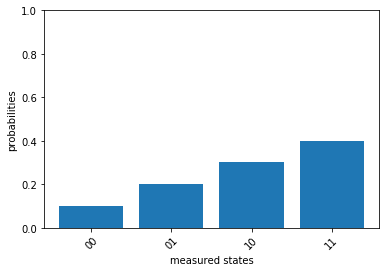

In [7]:
# given a python dict probability distribution
# generate a plot of the probability histogram

def plot_histogram(counts, title=""):
    n = len(next(iter(counts))) # get length of a ket in distribution
    N = 0 # total number of shots
    labels = list() # label each ket on x axis
    values = list() # number of shots measured for each ket
    for i in range(2**n):
        ket = format(i, "0%db" % n) # convert int to binary string
        labels.append(ket)
        if ket not in counts:
            values.append(0)
        else:
            values.append(counts[ket])
            N += counts[ket]

    # plot histogram of probabilities
    labels_num = range(len(labels))
    probs = np.array(values) / N
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.bar(labels_num, probs)
    ax.set(xticks=labels_num)
    ax.set_xticklabels(labels, rotation=45)
    ax.set(ylim=(0,1))
    ax.set(xlabel="measured states")
    ax.set(ylabel="probabilities")
    ax.set(title=title)
    return fig

plt.show(plot_histogram({"00": 100, "01": 200, "10": 300, "11": 400}))

## setup imbq and qiskit aer

In [4]:
# get backends
backends = dict()

# aer backends
for b in Aer.backends():
    backends["Aer."+str(b)] = b

# login to ibmq
token = "987d92114d0965a980e128f52d1a64870652140262a7dce07ab8ea3290d548fd" + \
        "d00abaaa1678f82c97349f1b16c3a2fb4d958405f5a3a89820012fb807b57c90"
#url = "https://quantumexperience.ng.bluemix.net/api" #v1
url = "https://auth.quantum-computing.ibm.com/api" #v2
#IBMQ.disable_account()
IBMQ.enable_account(token, url)

try:
    ibmq_backends = IBMQ.get_provider().backends()
except Exception as e: # try v1 way
    ibmq_backends = IBMQ.backends()
for b in ibmq_backends:
    backends["IBMQ."+str(b)] = b

# print backends
backend_names = list(backends.keys())
backend_names.sort()
print("backends:\n * "+("\n * ").join(backend_names))

#job = execute(qc, backend=backends["Aer.qasm_simulator"], shots=N)


# get noise profile
realboi = IBMQ.get_provider().get_backend('ibmq_16_melbourne')
properties = realboi.properties()
couple = realboi.configuration().coupling_map
noise_model = noise.device.basic_device_noise_model(properties)
basis_gates = noise_model.basis_gates
   

backends:
 * Aer.qasm_simulator
 * Aer.statevector_simulator
 * Aer.unitary_simulator
 * IBMQ.ibmq_16_melbourne
 * IBMQ.ibmq_ourense
 * IBMQ.ibmq_qasm_simulator
 * IBMQ.ibmq_vigo
 * IBMQ.ibmqx2


## define basic quantum circuit

In [8]:
def bell():
    q = QuantumRegister(2)
    c = ClassicalRegister(2)
    qc = QuantumCircuit(q, c)

    qc.h(q[0])
    qc.cx(q[0],q[1])
    qc.measure(q, c)
    return qc

# show circuit
qc = bell()
print(qc.draw())


         ┌───┐     ┌─┐   
q2_0: |0>┤ H ├──■──┤M├───
         └───┘┌─┴─┐└╥┘┌─┐
q2_1: |0>─────┤ X ├─╫─┤M├
              └───┘ ║ └╥┘
 c2_0: 0 ═══════════╩══╬═
                       ║ 
 c2_1: 0 ══════════════╩═
                         


simulating quantum computer

quantum computer simulator results:
{'00': 508, '11': 492}


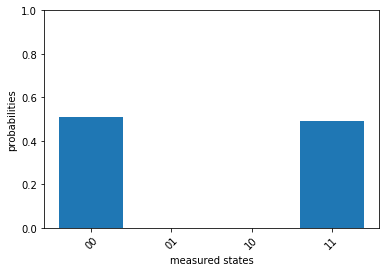

In [10]:
# run ciruit no noise
print("simulating quantum computer")
backend = backends["Aer.qasm_simulator"]
job = execute(qc, backend=backend, shots=1000)
counts = job.result().get_counts()

# show results
print(f"\nquantum computer simulator results:\n{counts}")
plt.show(plot_histogram(counts))

simulating quantum computer

quantum computer simulator results:
{'01': 56, '00': 421, '10': 71, '11': 452}


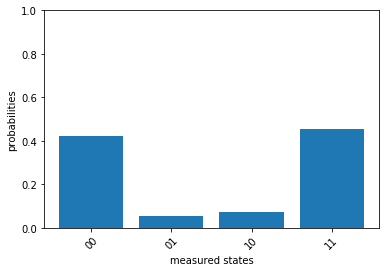

In [9]:
# run ciruit with noise
print("simulating quantum computer")
backend = backends["Aer.qasm_simulator"]
job = execute(qc, backend=backend, coupling_map=couple, noise_model=noise_model, basis_gates=basis_gates, shots=1000)
counts = job.result().get_counts()

# show results
print(f"\nquantum computer simulator results:\n{counts}")
plt.show(plot_histogram(counts))